# Introduction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('../input/insurance-premium-prediction/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# EDA

## Univariate

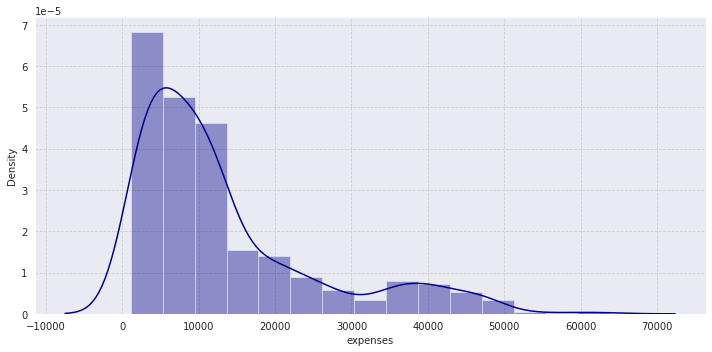

In [6]:
plt.figure(figsize=(10,5))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.distplot(df['expenses'],bins=15,color='darkblue')
plt.tight_layout()
plt.grid(True)
plt.show()

Distribution of expenses is right skewed.

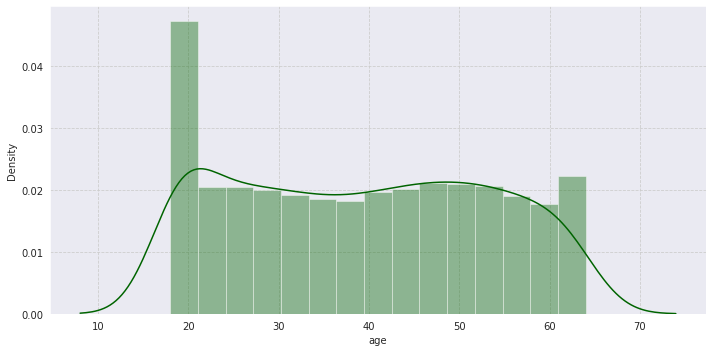

In [7]:
plt.figure(figsize=(10,5))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.distplot(df['age'],bins=15,color='darkgreen')
plt.tight_layout()
plt.grid(True)
plt.show()

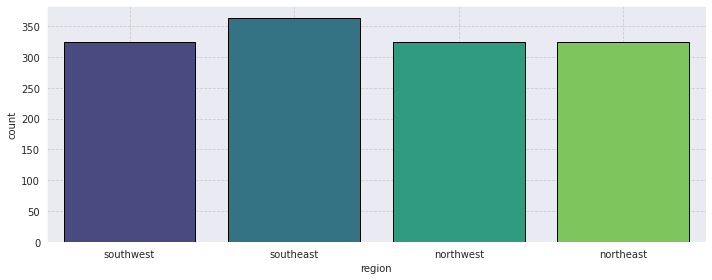

In [8]:
plt.figure(figsize=(10,4))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.countplot(x=df['region'],palette='viridis',saturation=0.8,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

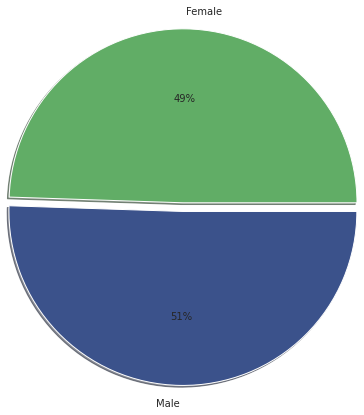

In [9]:
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
#to see the composition of Gender
out_df=pd.DataFrame(df.groupby('sex')['sex'].count())
colors = ['#61ad66','#3b528b']
plt.pie(out_df['sex'],labels=['Female','Male'],autopct='%.0f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show()

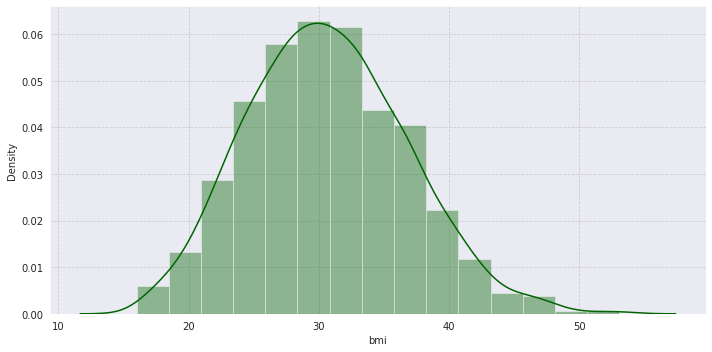

In [10]:
plt.figure(figsize=(10,5))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.distplot(df['bmi'],bins=15,color='darkgreen')
plt.tight_layout()
plt.grid(True)
plt.show()

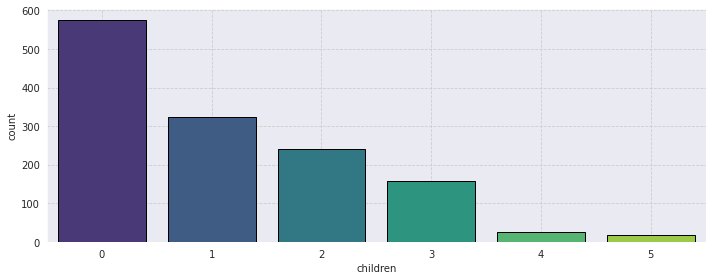

In [11]:
plt.figure(figsize=(10,4))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.countplot(x=df['children'],palette='viridis',saturation=0.8,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

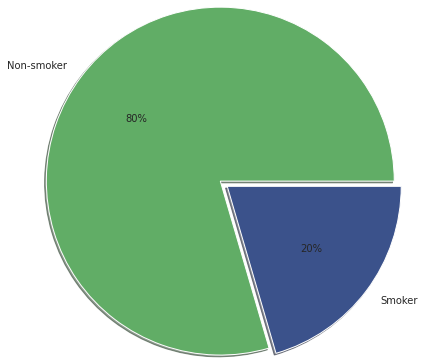

In [12]:
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
#to see the composition of smoker
out_df=pd.DataFrame(df.groupby('smoker')['smoker'].count())
colors = ['#61ad66','#3b528b']
plt.pie(out_df['smoker'],labels=['Non-smoker','Smoker'],autopct='%.0f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show()

## Multivariate

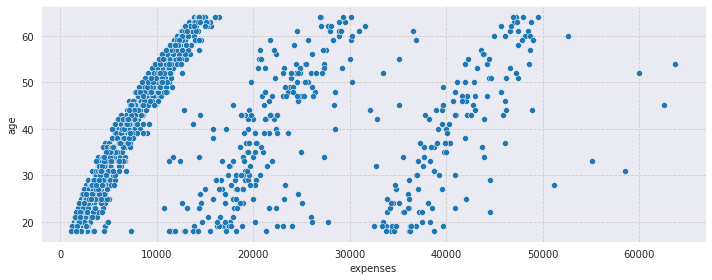

In [13]:
plt.figure(figsize=(10,4))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.scatterplot(y=df['age'],x=df['expenses'],palette='RdYlGn_r')
plt.tight_layout()
plt.grid(True)
plt.show()

In this graph you can see that younger applicants have lower expenses and older applicants have higher expenses.

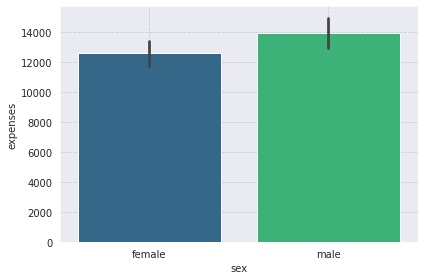

In [14]:
sns.barplot(x='sex',y='expenses',data=df,palette='viridis',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

Male applicant have a bit higher expense as compared to female.

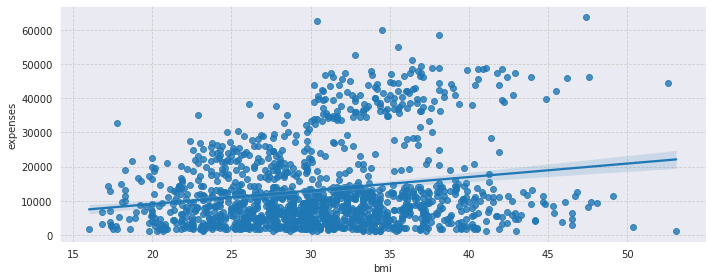

In [15]:
plt.figure(figsize=(10,4))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.regplot(x=df['bmi'],y=df['expenses'])
plt.tight_layout()
plt.grid(True)
plt.show()

There is a slight positive relation between BMI and expense

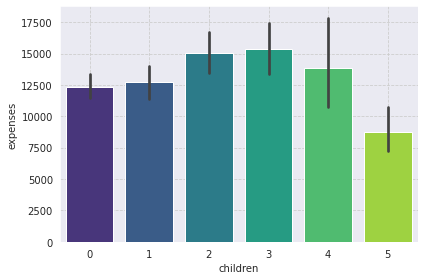

In [16]:
sns.barplot(x='children',y='expenses',data=df,palette='viridis',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

Applicant with 2 or 3 children have higher expenses

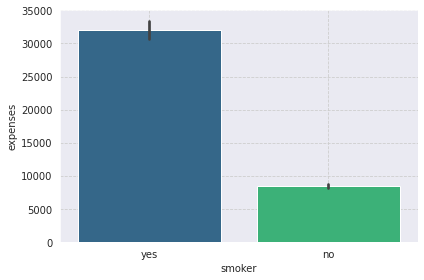

In [17]:
sns.barplot(x='smoker',y='expenses',data=df,palette='viridis',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

Smokers have insurance of high expense.

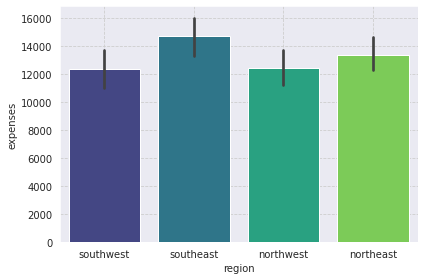

In [18]:
sns.barplot(x='region',y='expenses',data=df,palette='viridis',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

Applicant from southeast have higher expenses.

# Data preprocessing

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


## Coverting categorical columns to dummy variables

In [20]:
def cat2col(data,col):
    dummy=pd.get_dummies(data[col],drop_first=True)
    data.drop(col, axis=1,inplace=True)
    data= pd.concat([data,dummy],axis =1)
    return data

In [21]:
for i in df.columns:
    if df[i].dtype ==object:
        print(i)
        df =cat2col(df,i)

sex
smoker
region


In [22]:
df.head()

,age,bmi,children,expenses,male,yes,northwest,southeast,southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0


## Test train split

In [23]:
X=df.drop('expenses',axis=1)
y=df.expenses

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=12)

# Model fitting

In [25]:
scores=[]
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

## LinearRegression

In [26]:
from sklearn.linear_model import LinearRegression

model_lr=LinearRegression()
model_lr.fit(X_train,y_train)
pred_lr=model_lr.predict(X_test)

In [27]:
scores.append({
        'model': 'Linear Regression',
        'r2_score': r2_score(y_test, pred_lr)*100,
    'MS_score' : mean_squared_error(y_test,pred_lr)
    })

pred=pred_lr

print('Testing R2 Score: ', r2_score(y_test, pred_lr)*100,
      '\nTesting mean squared: ', mean_squared_error(y_test,pred_lr))

Testing R2 Score:  70.99717048857268 
Testing mean squared:  41767384.48798243


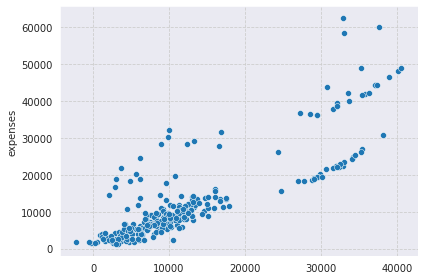

In [28]:
plt.figure(figsize=(6,4))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.scatterplot(x=pred,y=y_test)
plt.tight_layout()
plt.grid(True)
plt.show()

## DecisionTreeRegressor

In [29]:
from sklearn.tree import DecisionTreeRegressor

model_dt= DecisionTreeRegressor(random_state=12)
model_dt.fit(X_train,y_train)
pred_dt=model_dt.predict(X_test)

In [30]:
scores.append({
        'model': 'Decision Tree',
        'r2_score': r2_score(y_test, pred_dt)*100,
    'MS_score' : mean_squared_error(y_test,pred_dt)
    })

pred=pred_dt

print('Testing R2 Score: ', r2_score(y_test, pred_dt)*100,
      '\nTesting mean squared: ', mean_squared_error(y_test,pred_dt))

Testing R2 Score:  68.17717562586392 
Testing mean squared:  45828498.92643694


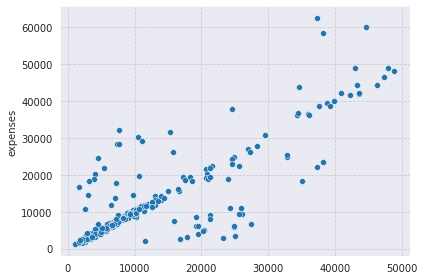

In [31]:
plt.figure(figsize=(6,4))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.scatterplot(x=pred,y=y_test)
plt.tight_layout()
plt.grid(True)
plt.show()

## RandomForestRegressor

In [32]:
from sklearn.ensemble import  RandomForestRegressor

model_rf= RandomForestRegressor(n_estimators=100)
model_rf.fit(X_train, y_train)
pred_rf= model_rf.predict(X_test)

In [33]:
scores.append({
        'model': 'Random Forest',
        'r2_score': r2_score(y_test, pred_rf)*100,
    'MS_score' : mean_squared_error(y_test,pred_rf)
    })

pred=pred_rf

print('Testing R2 Score: ', r2_score(y_test, pred_rf)*100,
      '\nTesting mean squared: ', mean_squared_error(y_test,pred_rf))

Testing R2 Score:  82.10814507988498 
Testing mean squared:  25766313.019810855


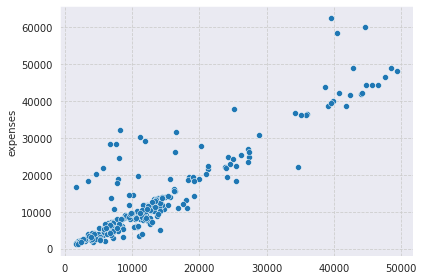

In [34]:
plt.figure(figsize=(6,4))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.scatterplot(x=pred,y=y_test)
plt.tight_layout()
plt.grid(True)
plt.show()

## XGBRFRegressor

In [35]:
from xgboost import XGBRFRegressor

model_xgb = XGBRFRegressor()
model_xgb.fit(X_train, y_train)
pred_xgb = model_xgb.predict(X_test)

In [36]:
scores.append({
        'model': 'XGB regressor',
        'r2_score': r2_score(y_test, pred_xgb)*100,
    'MS_score' : mean_squared_error(y_test,pred_xgb)
    })

pred=pred_xgb

print('Testing R2 Score: ', r2_score(y_test, pred_xgb)*100,
      '\nTesting mean squared: ', mean_squared_error(y_test,pred_xgb))

Testing R2 Score:  82.90838173465094 
Testing mean squared:  24613880.908736374


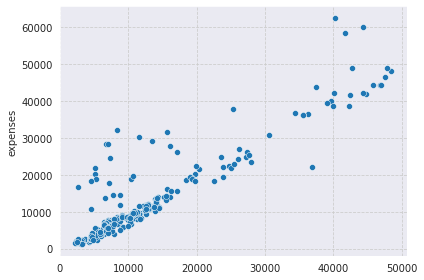

In [37]:
plt.figure(figsize=(6,4))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.scatterplot(x=pred,y=y_test)
plt.tight_layout()
plt.grid(True)
plt.show()

# Models evaluation

In [38]:
Score = pd.DataFrame(scores,columns=['model','r2_score','MS_score'])
Score.sort_values('r2_score',ascending=False,inplace=True)
Score

,model,r2_score,MS_score
3,XGB regressor,82.908382,2.461388e+07
2,Random Forest,82.108145,2.576631e+07
0,Linear Regression,70.997170,4.176738e+07
1,Decision Tree,68.177176,4.582850e+07


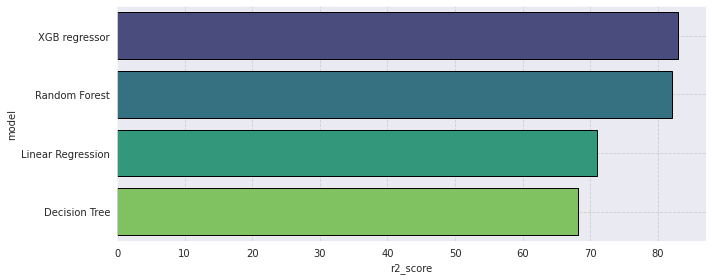

In [39]:
plt.figure(figsize=(10,4))
sns.barplot(y=Score['model'],x=Score['r2_score'],palette='viridis',edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

Here XG Boost regressor is the best model to fit.